# Plot skin temperature along the transect on 16 and 19 July 2022
- This script is used to plot daytime and nighttime skin temperature along the transect on 16 and 19 July 2022.
- Simulations: GM_SLUCM, GM_CLMU. 
- Reference data: MODIS, VIIRS.

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import matplotlib.transforms as mtransforms

In [2]:
model_list = ['modis', 'viirs', 'wrf', 'wrf-ctsm']
time_list = ['day', 'night']
labelcolor = '#6b6b6b'
lc1 = '#1f78b4'
lc2 = '#e31a1c'
lc_list = [labelcolor, 'black', lc1, lc2]
linestyle_list = ['-', '--', '-', '-']
ymin_list = [26, 3, 30, 16]
ymax_list = [38, 15, 48, 28]
linewidth = 0.5
markersize = 1
fontsize = 6
padding = 4
labelfont = 6
pad = 1
xwidth = 0.5
length = 2
label_list = ['MODIS', 'VIIRS', 'GM_SLUCM', 'GM_CLMU']
handletextpad = 0.5
date_list = ['07-16', '07-19']
ncols = len(time_list)
nrows = len(date_list)
xoffset = 0.045
yoffset = 0.05
xloc = -0.22

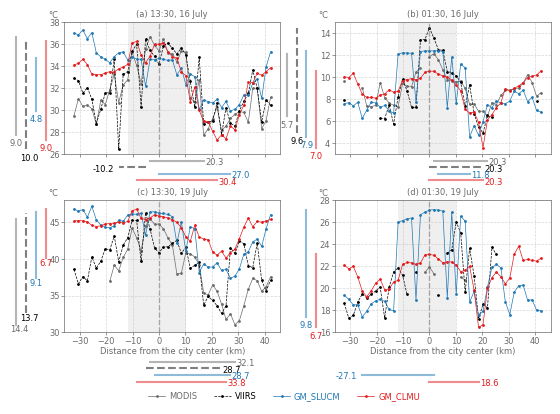

In [3]:
fig, axes = plt.subplots(ncols, nrows, figsize=(5.5, 4))
ax = axes.flatten()
for i in range(ncols*nrows):
    index_time = time_list[i%2]
    ymin = ymin_list[i]
    ymax = ymax_list[i]
    ax[i].set_ylim(ymin, ymax)
    index_date = i // 2
    date = date_list[index_date]
    df_section = pd.read_csv(f'data_for_figure/section_data_{date}.csv')
    yloc = [-0.05, -0.225][i//2]

    #ax[i].set_xlim(df_section['dist_km'].min(), df_section['dist_km'].max())   
    for m, model in enumerate(model_list):
        section_model = df_section[f'{model}_{index_time}']
        ax[i].plot(df_section['dist_km'], section_model,color = lc_list[m], marker='o', linestyle=linestyle_list[m], 
                   markersize=markersize, linewidth=linewidth, label=label_list[m])
        x_line = df_section['dist_km'].max() + 1
        trans = mtransforms.blended_transform_factory(ax[i].transAxes,ax[i].transData)
        transy = mtransforms.blended_transform_factory(ax[i].transData, ax[i].transAxes)
        df_section_sel = df_section[(df_section['dist_km'] <= 10) & (df_section['dist_km'] >= -10)]
        section_model_sel_min = df_section[f'{model}_{index_time}']
        section_model_sel_max = df_section_sel[f'{model}_{index_time}']
        if (i == 3) and model in ['modis', 'viirs']:
            continue
        
        ax[i].plot([xloc + xoffset*m, xloc + xoffset*m], [section_model_sel_min.min(), section_model_sel_max.max()], 
                   transform=trans,color=lc_list[m], linestyle=linestyle_list[m], linewidth=linewidth*3, clip_on=False, alpha = 0.5) 
        lst_max_min = np.round(section_model_sel_max.max() - section_model_sel_min.min(), 1)
        ax[i].text(xloc + xoffset*m -0.03, section_model_sel_min.min() -1, f'{lst_max_min}', color = lc_list[m], fontsize = fontsize, transform=trans)
        ax[i].plot([df_section['dist_km'][section_model_sel_max.idxmax()].item(), df_section['dist_km'][section_model_sel_min.idxmin()].item()], 
                   [yloc - yoffset*m, yloc - yoffset*m], transform=transy,color=lc_list[m], linestyle=linestyle_list[m], linewidth=linewidth*3, clip_on=False, alpha = 0.5)
        dis_max_min = np.round(df_section['dist_km'][section_model_sel_min.idxmin()].item() - df_section['dist_km'][section_model_sel_max.idxmax()].item(), 1)
        if dis_max_min > 0:
           text_x = df_section['dist_km'][section_model_sel_min.idxmin()].item() + 0.5
        else:
           text_x = df_section['dist_km'][section_model_sel_min.idxmin()].item() - 10
        ax[i].text(text_x, yloc - yoffset*m - 0.03, f'{dis_max_min}', color = lc_list[m], fontsize = fontsize, transform=transy)
    ax[i].plot([0, 0], [ymin, ymax], color = labelcolor, linestyle='--', linewidth=linewidth*2, alpha=0.5)
    ax[i].fill_between([-11.847675, 10.142986], ymin, ymax, edgecolor = None, facecolor = labelcolor, alpha=0.1, transform=ax[i].transData)
    if i // 2 == 0:
        ax[i].set_xlabel(None)
        ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=False, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    else:    
        ax[i].set_xlabel('Distance from the city center (km)', fontsize=fontsize, color = labelcolor, labelpad=1)   
        ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    
    ax[i].set_title( f'({string.ascii_lowercase[i]}) ' + ['13:30', '01:30'][i%2] + ', ' + ['16 July', '19 July'][index_date], fontsize=fontsize, color = labelcolor, pad = padding)
    ax[i].set_xticks(np.arange(-30, 50, 10))
    ax[i].set_ylabel('°C', fontsize=fontsize, rotation=0, ha='center', color=labelcolor, labelpad=2.5)
    ax[i].yaxis.set_label_coords(-0.05, 1.0225)  
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].grid(True,linestyle='--',linewidth=linewidth, alpha=0.5)
    for s, spine in enumerate(ax[i].spines.values()):
        spine.set_linewidth(xwidth)
        spine.set_edgecolor(labelcolor)  
lines, labels = ax[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=4)
for i, text in enumerate(legend.get_texts()):
    text.set_color(lc_list[i%4])
plt.subplots_adjust(left=0.1, right=0.985, bottom=0.175, top=0.95, wspace=0.25, hspace=0.35) 
plt.savefig('skin_temperature_section.png', dpi=300)
plt.savefig('skin_temperature_section.pdf', dpi=600)


# Description

In [22]:
summary_data = []
for i in range(ncols*nrows):
    index_time = time_list[i%2]
    ymin = ymin_list[i]
    ymax = ymax_list[i]
    ax[i].set_ylim(ymin, ymax)
    index_date = i // 2
    date = date_list[index_date]
    df_section = pd.read_csv(f'data_for_figure/section_data_{date}.csv')
    yloc = [-0.05, -0.225][i//2]

    #ax[i].set_xlim(df_section['dist_km'].min(), df_section['dist_km'].max())   
    for m, model in enumerate(model_list):
        section_model = df_section[f'{model}_{index_time}']
        ax[i].plot(df_section['dist_km'], section_model,color = lc_list[m], marker='o', linestyle=linestyle_list[m], 
                   markersize=markersize, linewidth=linewidth, label=label_list[m])
        x_line = df_section['dist_km'].max() + 1
        trans = mtransforms.blended_transform_factory(ax[i].transAxes,ax[i].transData)
        transy = mtransforms.blended_transform_factory(ax[i].transData, ax[i].transAxes)
        df_section_sel = df_section[(df_section['dist_km'] <= 10) & (df_section['dist_km'] >= -10)]
        section_model_sel_min = df_section[f'{model}_{index_time}']
        section_model_sel_max = df_section_sel[f'{model}_{index_time}']
        min_val = np.round(section_model_sel_min.min(), 1)
        max_val = np.round(section_model_sel_max.max(), 1)
        diff_val = np.round(section_model_sel_max.max() - section_model_sel_min.min(), 1)
        dist_range = np.round(df_section['dist_km'][section_model_sel_min.idxmin()].item() - df_section['dist_km'][section_model_sel_max.idxmax()].item(), 1)
        summary_data.append({
            'date': date,
            'time': index_time,
            'model': model,
            'min': min_val,
            'max': max_val,
            'range': diff_val,
            'distance_range': dist_range
        })

df_summary = pd.DataFrame(summary_data)
df_summary 

,date,time,model,min,max,range,distance_range
0,07-16,day,modis,27.7,36.7,9.0,20.3
1,07-16,day,viirs,26.5,36.5,10.0,-10.2
2,07-16,day,wrf,29.9,34.7,4.8,27.0
3,07-16,day,wrf-ctsm,27.3,36.3,9.0,30.4
4,07-16,night,modis,6.4,12.1,5.7,20.3
5,07-16,night,viirs,4.9,14.5,9.6,20.3
6,07-16,night,wrf,4.6,12.4,7.9,11.8
7,07-16,night,wrf-ctsm,3.6,10.5,7.0,20.3
8,07-19,day,modis,31.0,45.5,14.4,32.1
9,07-19,day,viirs,32.6,46.3,13.7,28.7
